<a href="https://colab.research.google.com/github/ilhamydn17/2141720091-MachLearn-2023/blob/week-07/PCVK_Week_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum Week-07 | Histogram

### Membuat Ouput Histogram

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv_imshow
import numpy as np
import math
import os
import glob



In [2]:
# read input image
image = cv.imread('drive/MyDrive/Kuliah/PCVK/lena.jpg')

#### 1. Menghitung jumlah kemunculan setiap piksel warna di seluruh piksel gambar yang ada:

In [3]:
# split the image into its individual color channels
b, g, r = cv.split(image)

# calculate the histogram for each color channel
hist_r_cv= cv.calcHist([r], [0], None, [256], [0, 256])
hist_g_cv = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b_cv = cv.calcHist([b], [0], None, [256], [0, 256])

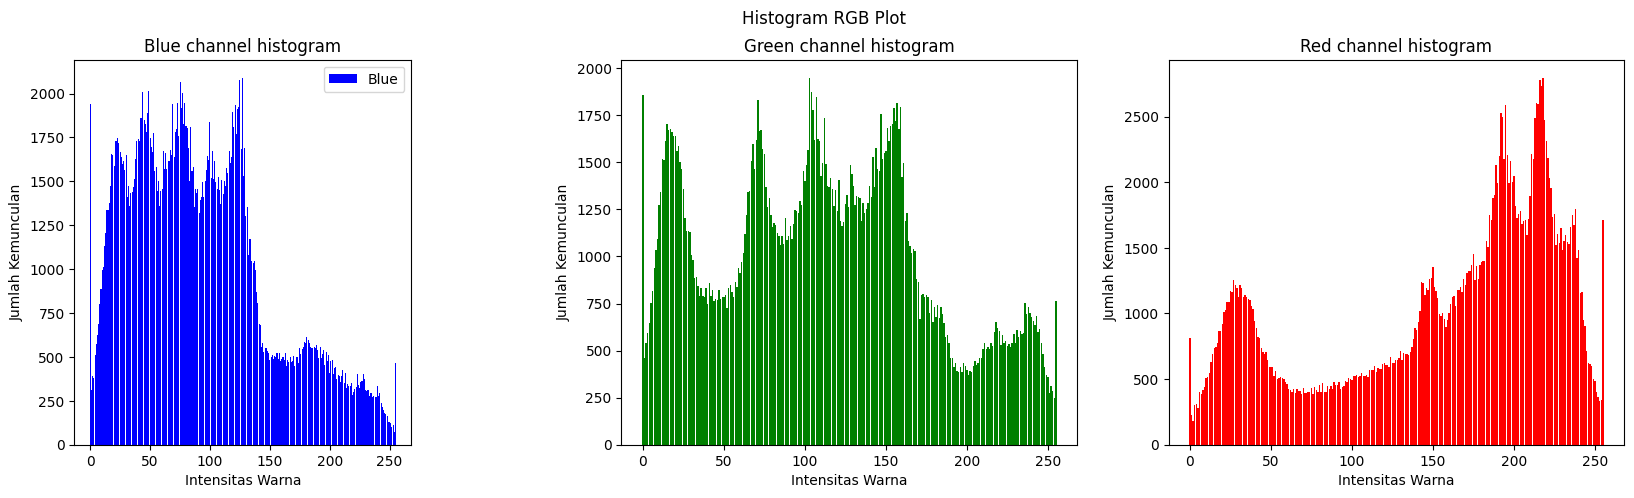

In [4]:
# Create a figure to plot the histogram
fig = plt.figure(figsize=(20, 5))

# Plot the histogram for each color channel

plt.subplot(133)
plt.bar(range(256), hist_r_cv.ravel(), color='red', label='Red',width=0.86)
plt.title('Red channel histogram')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(132)
plt.bar(range(256), hist_g_cv.ravel(), color='green', label='Green', width=0.86)
plt.title('Green channel histogram')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(141)
plt.bar(range(256), hist_b_cv.ravel(), color='blue', label='Blue', width=0.86)
plt.title('Blue channel histogram')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')


# Set the title and labels for the plot
plt.suptitle('Histogram RGB Plot')
plt.legend()

# Show the histogram plot
plt.show()

#### 2. Membuat Histogram Dengan Numpy

In [5]:
# Calculate the histogram for each color channel using NumPy histogram function
hist_b_np = np.histogram(b, bins=256, range=(0, 256))[0]
hist_g_np = np.histogram(g, bins=256, range=(0, 256))[0]
hist_r_np = np.histogram(r, bins=256, range=(0, 256))[0]

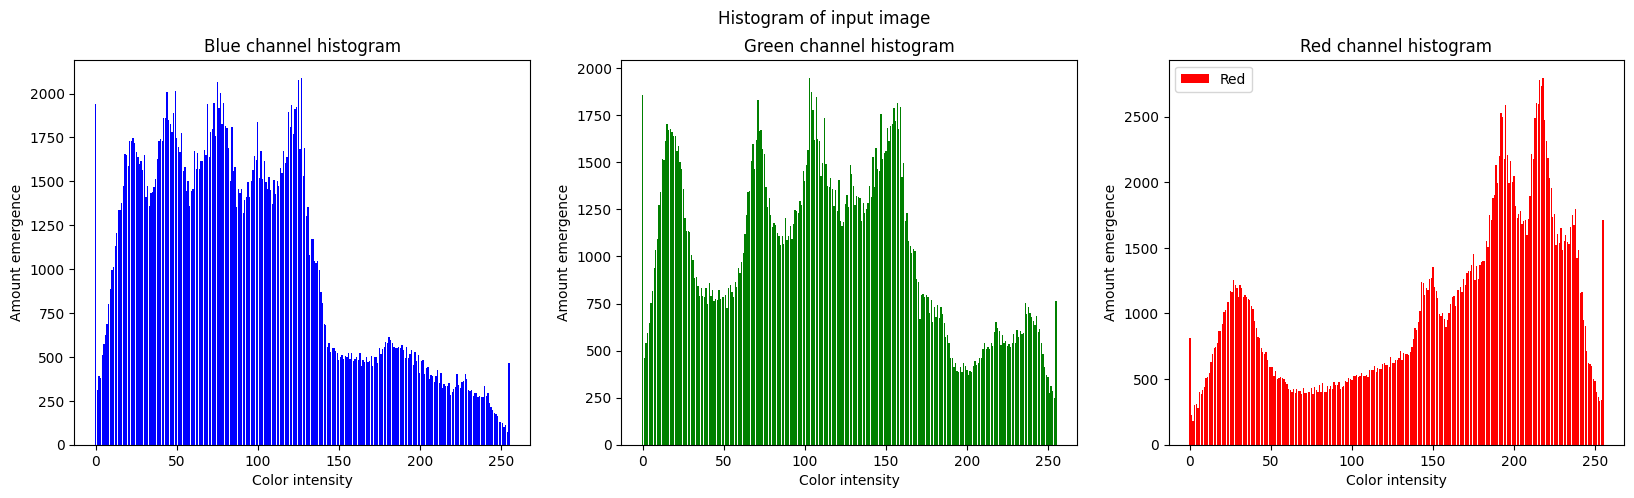

In [6]:
# Create a figure to plot the histogram
fig = plt.figure(figsize=(20, 5))

# Plot the histogram for each color channel
plt.subplot(131)
plt.bar(range(256), hist_b_np, color='blue', label='Blue')
plt.title('Blue channel histogram')
plt.xlabel('Color intensity')
plt.ylabel('Amount emergence')

plt.subplot(132)
plt.bar(range(256), hist_g_np, color='green', label='Green')
plt.title('Green channel histogram')
plt.xlabel('Color intensity')
plt.ylabel('Amount emergence')

plt.subplot(133)
plt.bar(range(256), hist_r_np, color='red', label='Red')
plt.title('Red channel histogram')
plt.xlabel('Color intensity')
plt.ylabel('Amount emergence')

# Set the title and labels for the plot
plt.suptitle('Histogram of input image')
plt.legend()

# Show the histogram plot
plt.show()

#### 3. Buatlah histogram citra seperti output histogram equalization

##### Tanpa equalizeHist

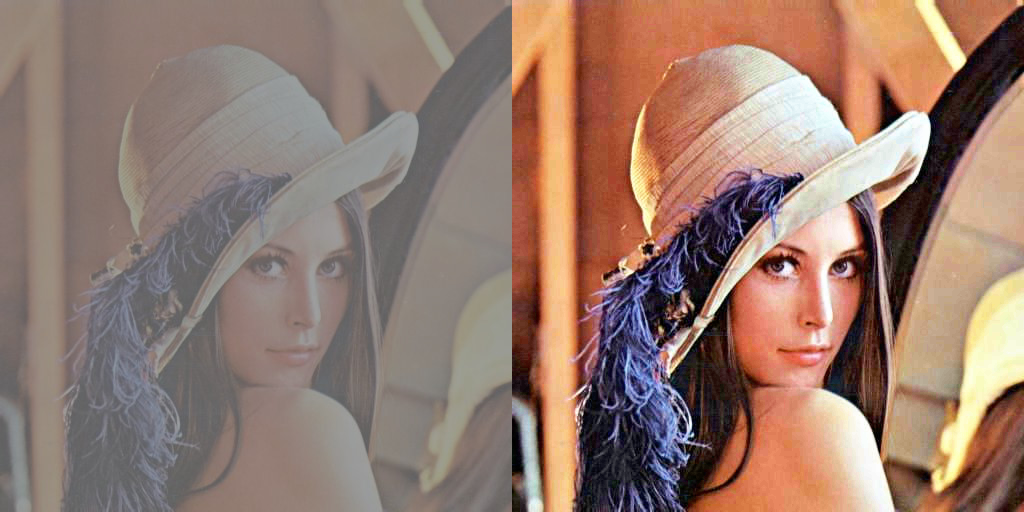

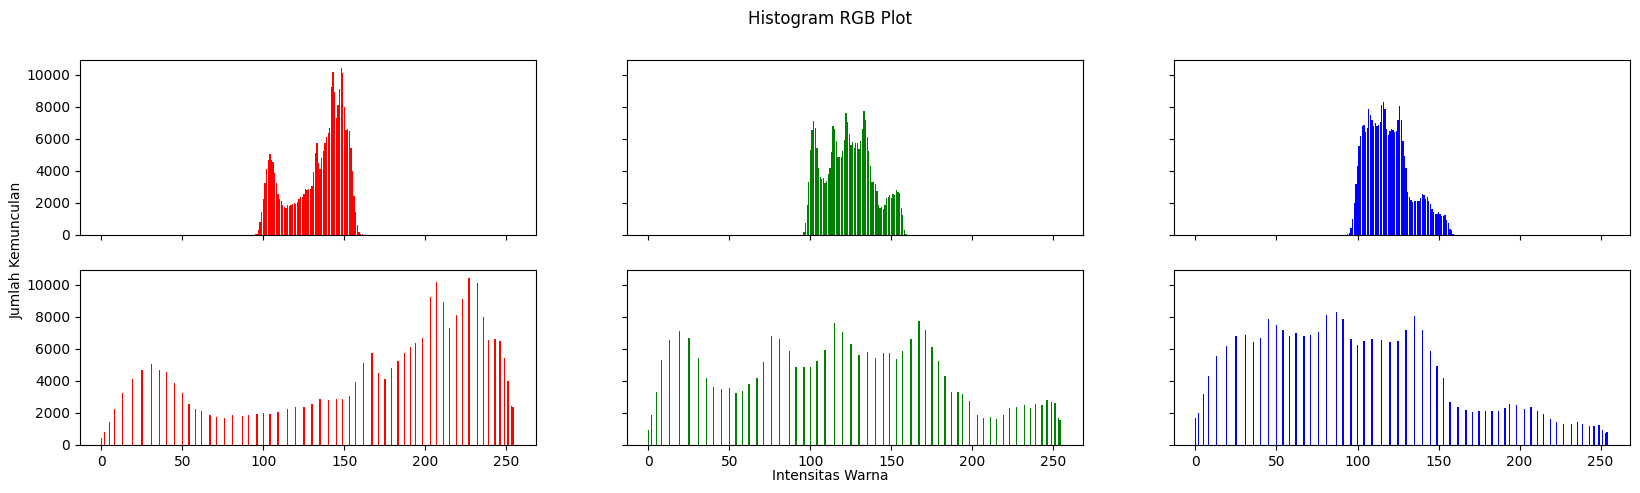

In [7]:
# Load the color image
image = cv.imread('drive/MyDrive/Kuliah/PCVK/lena_lc.jpg')

def histog(image):
    height, width, depth = np.shape(image)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][image[y][x][0]] += 1
            ax[1][image[y][x][1]] += 1
            ax[2][image[y][x][2]] += 1
    return ax

# Menghitung histogram gambar asli (img1)
ori_histogram = histog(image)

# Konversi gambar asli ke bentuk Numpy array
img_array = np.asarray(image)

# Menghitung histogram gambar menggunakan np.bincount
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalisasi histogram
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Menghitung cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Membuat peta transformasi untuk equalization
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Mengubah gambar asli menggunakan peta transformasi
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
equalized_image = eq_img_array

# Menghitung histogram gambar setelah equalization (img2)
equal_histo = histog(equalized_image)

# Menggabungkan gambar asli dan gambar hasil equalization
final_frame = cv.hconcat((image, equalized_image))
cv_imshow(final_frame)

color_ranges = np.arange(256)

# Mengonversi gambar asli dan hasil equalization menjadi grayscale
img1_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
img2_gray = cv.cvtColor(equalized_image, cv.COLOR_BGR2GRAY)

# Mengecek apakah gambar sudah dalam grayscale atau tidak
is_gray_img = np.array_equal(img1_gray, img2_gray)

# Menampilkan plot histogram
if not is_gray_img:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(color_ranges, ori_histogram[2], color='red')
    axs[0, 1].bar(color_ranges, ori_histogram[1], color='green')
    axs[0, 2].bar(color_ranges, ori_histogram[0], color='blue')
    axs[1, 0].bar(color_ranges, equal_histo[2], color='red')
    axs[1, 1].bar(color_ranges, equal_histo[1], color='green')
    axs[1, 2].bar(color_ranges, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(color_ranges, ori_histogram[2], color='gray')
    axs[1].bar(color_ranges, equal_histo[2], color='gray')

plt.show()

###### Menggunakan equalizeHist

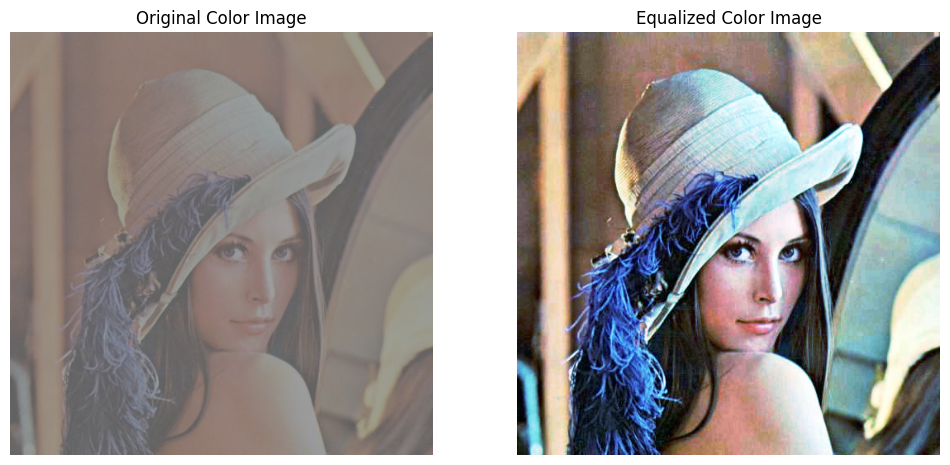

In [8]:
# Load the image
image_eqHist = cv.imread('drive/MyDrive/Kuliah/PCVK/lena_lc.jpg')

# Separate the color channels
b, g, r = cv.split(image_eqHist)

# Apply histogram equalization to each channel
equalized_b = cv.equalizeHist(b)
equalized_g = cv.equalizeHist(g)
equalized_r = cv.equalizeHist(r)

# Merge the equalized channels back into a color image
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))

# Plot the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Color Image')
plt.imshow(cv.cvtColor(image_eqHist, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Color Image')
plt.imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

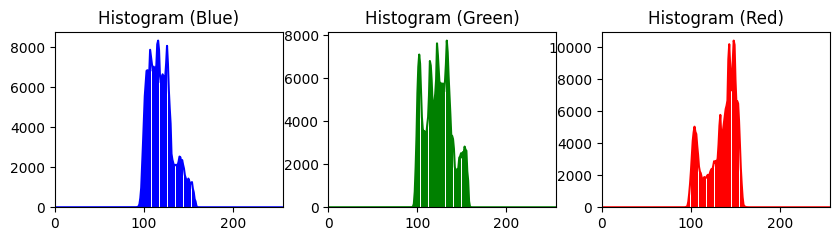

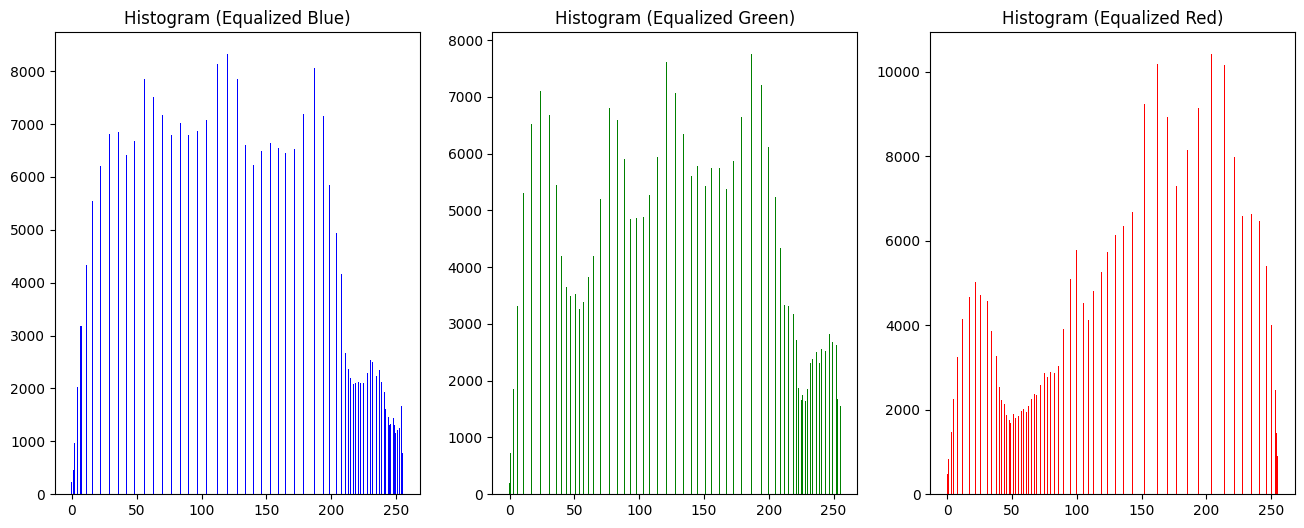

In [9]:
# Visualisasi Histogram Sebelum dan Sesudah Proses Equalized
# Apply histogram equalization to each channel
equalized_b = cv.equalizeHist(b)
equalized_g = cv.equalizeHist(g)
equalized_r = cv.equalizeHist(r)

# Merge the equalized channels back into a color image
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))

# Create histograms for the original and equalized channels
hist_b, bins_b = np.histogram(b, 256, [0, 256])
hist_g, bins_g = np.histogram(g, 256, [0, 256])
hist_r, bins_r = np.histogram(r, 256, [0, 256])

hist_equalized_b, bins_equalized_b = np.histogram(equalized_b, 256, [0, 256])
hist_equalized_g, bins_equalized_g = np.histogram(equalized_g, 256, [0, 256])
hist_equalized_r, bins_equalized_r = np.histogram(equalized_r, 256, [0, 256])

# Plot the original and equalized images along with histograms
plt.figure(figsize=(10, 5))

# Histograms of Original Image
plt.subplot(2, 3, 4)
plt.title('Histogram (Blue)')
plt.plot(hist_b, color='blue')
plt.xlim([0, 256])

plt.subplot(2, 3, 5)
plt.title('Histogram (Green)')
plt.plot(hist_g, color='green')
plt.xlim([0, 256])

plt.subplot(2, 3, 6)
plt.title('Histogram (Red)')
plt.plot(hist_r, color='red')
plt.xlim([0, 256])

# Histograms of Original Image
plt.subplot(2, 3, 4)
plt.title('Histogram (Blue)')
plt.bar(bins_b[:-1], hist_b, width=0.89, color='blue')

plt.subplot(2, 3, 5)
plt.title('Histogram (Green)')
plt.bar(bins_g[:-1], hist_g, width=0.89, color='green')

plt.subplot(2, 3, 6)
plt.title('Histogram (Red)')
plt.bar(bins_r[:-1], hist_r, width=0.89, color='red')

# Histograms of Equalized Image
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.title('Histogram (Equalized Blue)')
plt.bar(bins_equalized_b[:-1], hist_equalized_b, width=0.8, color='blue')

plt.subplot(1, 3, 2)
plt.title('Histogram (Equalized Green)')
plt.bar(bins_equalized_g[:-1], hist_equalized_g, width=0.8, color='green')

plt.subplot(1, 3, 3)
plt.title('Histogram (Equalized Red)')
plt.bar(bins_equalized_r[:-1], hist_equalized_r, width=0.8, color='red')

plt.show()

####  4. Pemetaan 16 juta warna RGB ke dalam 8 warna saja

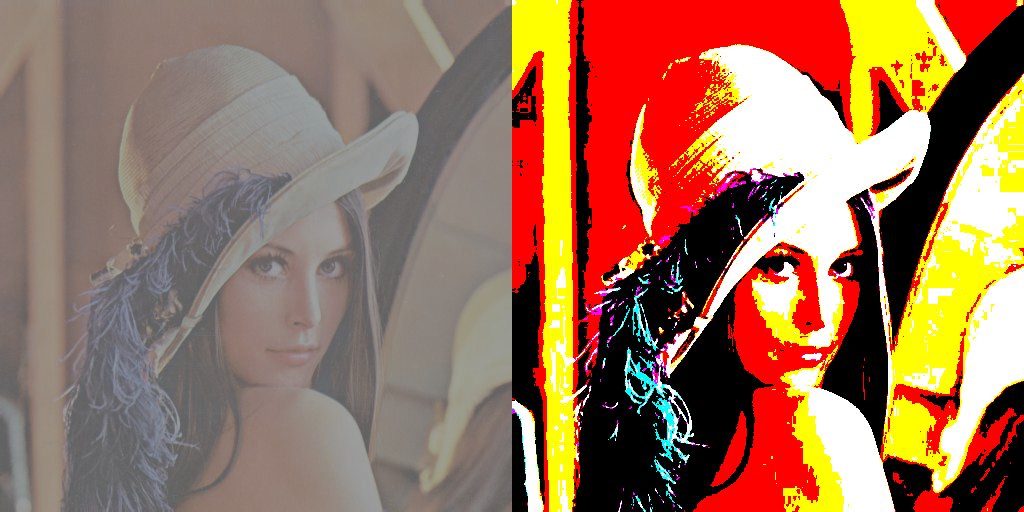

In [10]:
# Define the specified colors: Black, Green, Yellow, Blue, Cyan, Magenta, White
specified_colors = [
    (0, 0, 0),      # Black
    (0, 255, 0),    # Green
    (255, 255, 0),  # Yellow
    (0, 0, 255),    # Blue
    (0, 255, 255),  # Cyan
    (255, 0, 255),  # Magenta
    (255, 255, 255) # White
]

# Function to find the nearest specified color
def find_nearest_color(color):
    color = np.array(color)
    color_distances = [np.linalg.norm(color - np.array(spec_color)) for spec_color in specified_colors]
    nearest_color_index = np.argmin(color_distances)
    return specified_colors[nearest_color_index]

# Map each pixel to the nearest specified color
height, width, _ = image.shape
output_image = np.zeros((height, width, 3), dtype=np.uint8)

for y in range(height):
    for x in range(width):
        pixel = image[y, x]
        nearest_color = find_nearest_color(pixel)
        output_image[y, x] = nearest_color

# Display the quantized image
final_frame = cv.hconcat((image, output_image))
cv_imshow(final_frame)

#### 5. Proses Dithering Floyd and Steinberg

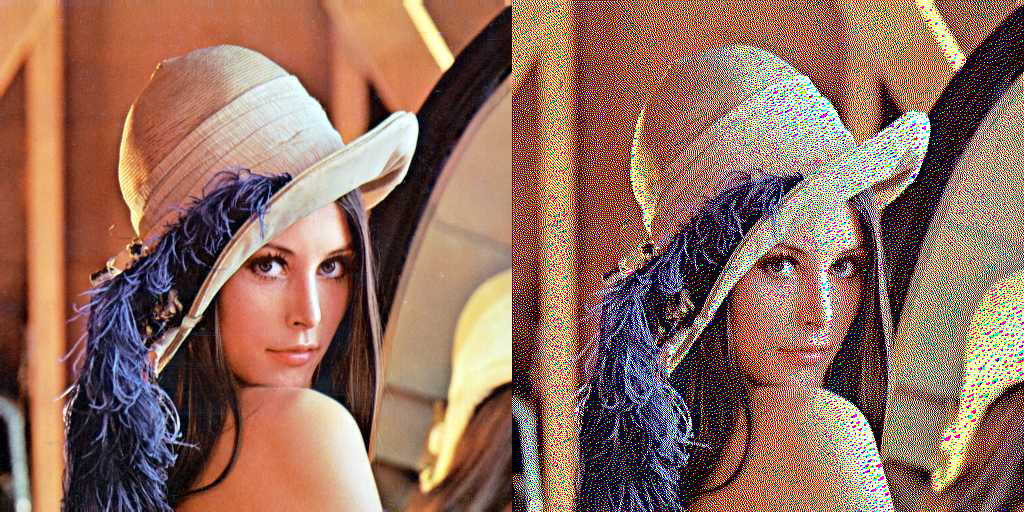

In [36]:
# read image
image_ori = cv.imread('drive/MyDrive/Kuliah/PCVK/lena.jpg')
image_output = cv.imread('drive/MyDrive/Kuliah/PCVK/lena.jpg')

# Define the Floyd-Steinberg dithering matrix
dither_matrix = np.array([[0, 0, 7],
                          [3, 5, 1]]) / 16

# Iterate through each pixel and apply dithering to each color channel
height, width, _ = image_output.shape

threshold = 150

for y in range(height):
    for x in range(width):
        for c in range(3):  # Loop through the color channels (B, G, R)
            old_pixel = image_output[y, x, c]
            new_pixel = (old_pixel > threshold) * 255  # Thresholding
            image_output[y, x, c] = new_pixel
            quantization_error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            for dy in range(2):
                for dx in range(3):
                    if 0 <= y + dy < height and 0 <= x - 1 + dx < width:
                        image_output[y + dy, x - 1 + dx, c] += quantization_error * dither_matrix[dy, dx]

# Display the dithered image
final_frame =cv.hconcat((image_ori, image_output ))
cv_imshow(final_frame)

#### 6. Mengubah "lena_lc.jpg" menjadi grey image, lalu menerapkan histogram equalization. Kemudian diimplementasikan proses dithering Floyd and Steinberg

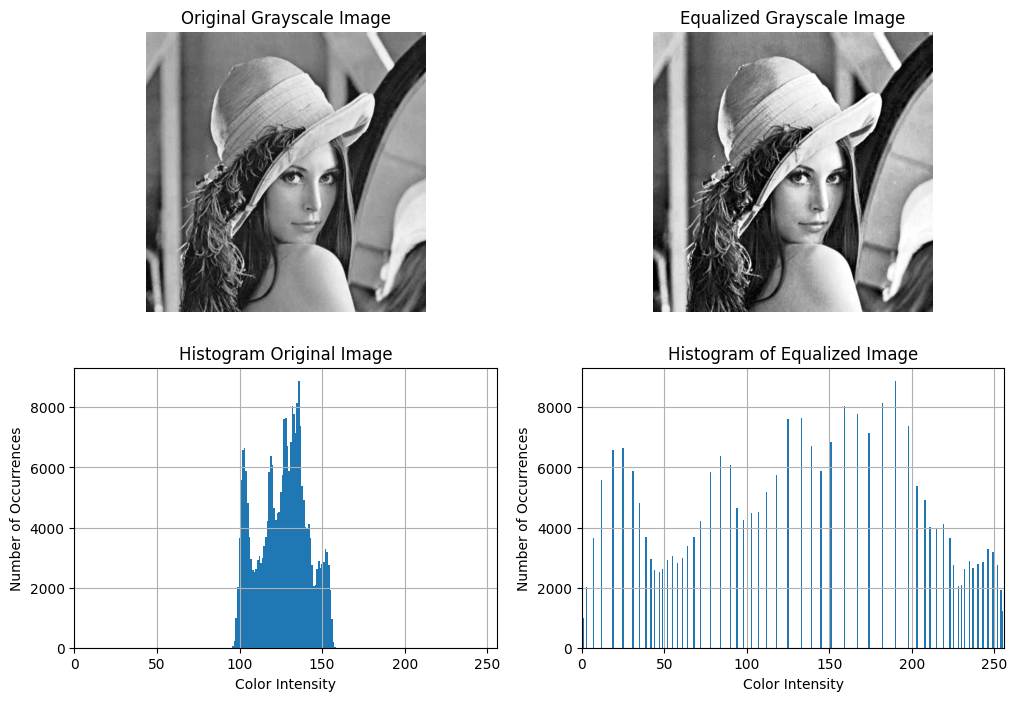

True

In [84]:
# Load the grayscale image
image_eqHist_gray = cv.imread('drive/MyDrive/Kuliah/PCVK/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Apply histogram equalization to the grayscale image
equalized_image_gray = cv.equalizeHist(image_eqHist_gray)

# Create histograms for the original and equalized images
hist_original = cv.calcHist([image_eqHist_gray], [0], None, [256], [0, 256])
hist_equalized = cv.calcHist([equalized_image_gray], [0], None, [256], [0, 256])

# Plot the original and equalized grayscale images and their histograms
plt.figure(figsize=(12, 8))

# Original Grayscale Image
plt.subplot(2, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(image_eqHist_gray, cmap='gray')
plt.axis('off')

# Equalized Grayscale Image
plt.subplot(2, 2, 2)
plt.title('Equalized Grayscale Image')
plt.imshow(equalized_image_gray, cmap='gray')
plt.axis('off')

# Histogram of Original Grayscale Image
plt.subplot(2, 2, 3)
plt.title('Histogram Original Image')
plt.xlabel('Color Intensity')
plt.ylabel('Number of Occurrences')
plt.bar(np.arange(256), hist_original[:, 0], width=1)
plt.xlim([0, 256])
plt.grid()

# Histogram of Equalized Grayscale Image
plt.subplot(2, 2, 4)
plt.title('Histogram of Equalized Image')
plt.xlabel('Color Intensity')
plt.ylabel('Number of Occurrences')
plt.bar(np.arange(256), hist_equalized[:, 0], width=0.8)
plt.xlim([0, 256])
plt.grid()

plt.show()

output_file_path = 'drive/MyDrive/Kuliah/PCVK/eq_image_gray.jpg'  # Provide the path where you want to save the image
cv.imwrite(output_file_path, equalized_image_gray)

(-0.5, 511.5, 511.5, -0.5)

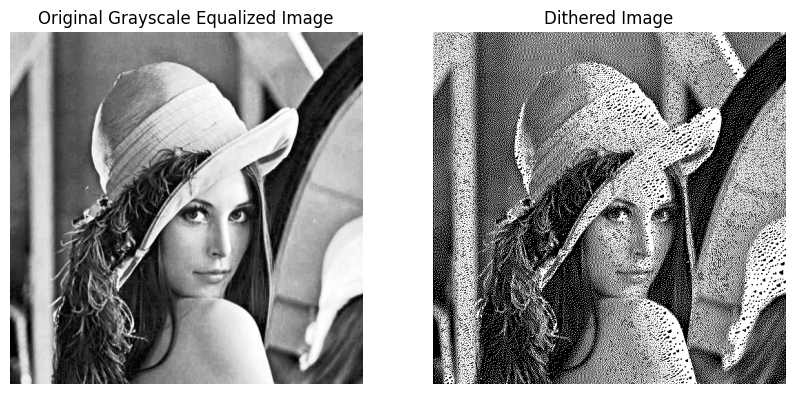

In [85]:
# Proses Disthered dan Steinberg

image_ori = cv.imread('drive/MyDrive/Kuliah/PCVK/eq_image_gray.jpg')
image_output = equalized_image_gray

# Define the Floyd-Steinberg dithering matrix
dither_matrix = np.array([[0, 0, 7],
                          [3, 5, 1]]) / 16

# Iterate through each pixel and apply dithering to each color channel
height, width = image_output.shape

threshold = 155

for y in range(height):
    for x in range(width):
        for c in range(3):  # Loop through the color channels (B, G, R)
            old_pixel = image_output[y, x]
            new_pixel = (old_pixel > threshold) * 255  # Thresholding
            image_output[y, x] = new_pixel
            quantization_error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            for dy in range(2):
                for dx in range(3):
                    if 0 <= y + dy < height and 0 <= x - 1 + dx < width:
                        image_output[y + dy, x - 1 + dx] += quantization_error * dither_matrix[dy, dx]

# Display the dithered image

# Plot the original and equalized grayscale images
plt.figure(figsize=(10, 5))

# Original Grayscale Image
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Equalized Image')
plt.imshow(image_ori, cmap='gray')
plt.axis('off')

# Equalized Grayscale Image
plt.subplot(1, 2, 2)
plt.title('Dithered Image')
plt.imshow(image_output, cmap='gray')
plt.axis('off')